In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from IPython.display import Markdown


## Carregando o Conjunto de Dados 

In [3]:

# Pinguins
df_penguins = sns.load_dataset('penguins')
display(Markdown("## Pinguins dataset"))
display(df_penguins.head())

display(Markdown("### Exploração dos dados"))
df_penguins.info()

display(Markdown("### Estatísticas descritivas"))
display(df_penguins.describe())


## Pinguins dataset

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


### Exploração dos dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Estatísticas descritivas

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Criando um Dicionário

In [4]:
df_dict = pd.DataFrame([
    {
        "variavel": "species",
        "descricao": "Espécie do pinguim ('Adelie', 'Chinstrap', 'Gentoo')",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },{
        "variavel": "island",
        "descricao": "Ilha em que o pinguim foi encontrado ('Torgersen', 'Biscoe', 'Dream')",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    },{
        "variavel": "bill_length_mm",
        "descricao": "Comprimento do bico do pinguim em milímetros",
        "tipo": "quantitativa",
        "subtipo": "continua"
    },{
        "variavel": "bill_depth_mm",
        "descricao": "Profundidade do bico do pinguim em milímetros",
        "tipo": "quantitativa",
        "subtipo": "continua"
    },{
        "variavel": "flipper_length_mm",
        "descricao": "Comprimento da nadadeira do pinguim em milímetros",
        "tipo": "quantitativa",
        "subtipo": "continua"
    },{
        "variavel": "body_mass_g",
        "descricao": "Massa corporal do pinguim em gramas",
        "tipo": "quantitativa",
        "subtipo": "continua"
    },{
        "variavel": "sex",
        "descricao": "Sexo do pinguim ('Male', 'Female')",
        "tipo": "qualitativa",
        "subtipo": "nominal"
    }
])

df_dict

,variavel,descricao,tipo,subtipo
0,species,"Espécie do pinguim ('Adelie', 'Chinstrap', 'Ge...",qualitativa,nominal
1,island,Ilha em que o pinguim foi encontrado ('Torgers...,qualitativa,nominal
2,bill_length_mm,Comprimento do bico do pinguim em milímetros,quantitativa,continua
3,bill_depth_mm,Profundidade do bico do pinguim em milímetros,quantitativa,continua
4,flipper_length_mm,Comprimento da nadadeira do pinguim em milímetros,quantitativa,continua
5,body_mass_g,Massa corporal do pinguim em gramas,quantitativa,continua
6,sex,"Sexo do pinguim ('Male', 'Female')",qualitativa,nominal


## Dados Qualitativos 


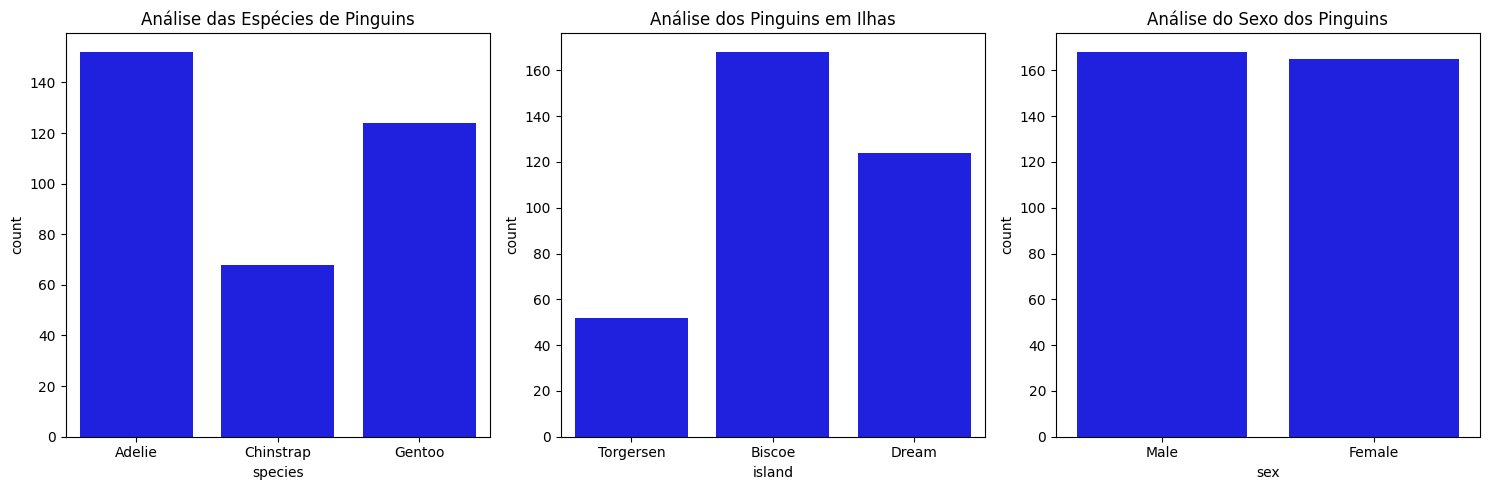

In [5]:



cor = 'blue'
# Criar uma figura com subplots
plt.figure(figsize=(15, 5))  # Defina o tamanho da figura

# Subplot 1 - Análise das espécies de pinguins
plt.subplot(1, 3, 1)  # 1 linha, 3 colunas, primeiro gráfico
sns.countplot(data=df_penguins, x="species",color=cor)
plt.title('Análise das Espécies de Pinguins')

# Subplot 2 - Análise dos pinguins em ilhas
plt.subplot(1, 3, 2)  # 1 linha, 3 colunas, segundo gráfico
sns.countplot(data=df_penguins, x="island",color=cor)
plt.title('Análise dos Pinguins em Ilhas')

# Subplot 3 - Análise do sexo dos pinguins
plt.subplot(1, 3, 3)  # 1 linha, 3 colunas, terceiro gráfico
sns.countplot(data=df_penguins, x="sex",color=cor)
plt.title('Análise do Sexo dos Pinguins')

# Ajustar o layout para evitar sobreposição de títulos
plt.tight_layout()

# Exibir os gráficos lado a lado
plt.show()









## Trantando os dados QUANTITATIVOS

In [6]:
print("Media:", df_penguins['bill_length_mm'].mean().round(2))
print("Mediana:", df_penguins['bill_length_mm'].median())
print("Moda:", df_penguins['bill_length_mm'].mode())
print("Amplitude:", df_penguins['bill_length_mm'].max() - df_penguins['bill_length_mm'].min())
print("Variância:", df_penguins['bill_length_mm'].var().round(2))
print("Desvio Padrão:", df_penguins['bill_length_mm'].std().round(2))


Media: 43.92
Mediana: 44.45
Moda: 0    41.1
dtype: float64
Amplitude: 27.5
Variância: 29.81
Desvio Padrão: 5.46


In [7]:
print("Media:", df_penguins['bill_depth_mm'].mean().round(2))
print("Mediana:", df_penguins['bill_depth_mm'].median())
print("Moda:", df_penguins['bill_depth_mm'].mode())
print("Amplitude:", df_penguins['bill_depth_mm'].max() - df_penguins['bill_depth_mm'].min())
print("Variância:", df_penguins['bill_depth_mm'].var().round(2))
print("Desvio Padrão:", df_penguins['bill_depth_mm'].std().round(2))

Media: 17.15
Mediana: 17.3
Moda: 0    17.0
dtype: float64
Amplitude: 8.4
Variância: 3.9
Desvio Padrão: 1.97


In [8]:
print("Media:", df_penguins['flipper_length_mm'].mean().round(2))
print("Mediana:", df_penguins['flipper_length_mm'].median())
print("Moda:", df_penguins['flipper_length_mm'].mode())
print("Amplitude:", df_penguins['flipper_length_mm'].max() - df_penguins['flipper_length_mm'].min())
print("Variância:", df_penguins['flipper_length_mm'].var().round(2))
print("Desvio Padrão:", df_penguins['flipper_length_mm'].std().round(2))

Media: 200.92
Mediana: 197.0
Moda: 0    190.0
dtype: float64
Amplitude: 59.0
Variância: 197.73
Desvio Padrão: 14.06


In [9]:
print("Media:", df_penguins['body_mass_g'].mean().round(2))
print("Mediana:", df_penguins['body_mass_g'].median())
print("Moda:", df_penguins['body_mass_g'].mode())
print("Amplitude:", df_penguins['body_mass_g'].max() - df_penguins['body_mass_g'].min())
print("Variância:", df_penguins['body_mass_g'].var().round(2))
print("Desvio Padrão:", df_penguins['body_mass_g'].std().round(2))

Media: 4201.75
Mediana: 4050.0
Moda: 0    3800.0
dtype: float64
Amplitude: 3600.0
Variância: 643131.08
Desvio Padrão: 801.95
